In [3]:
import warnings 
warnings.filterwarnings('ignore') 
import pandas as pd 
import re 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud


In [4]:
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [5]:
data = pd.read_csv('flipkart_data.csv') 
data.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [6]:
# unique ratings 
pd.unique(data['rating'])


array([5, 4, 1, 3, 2], dtype=int64)

<AxesSubplot:xlabel='rating', ylabel='count'>

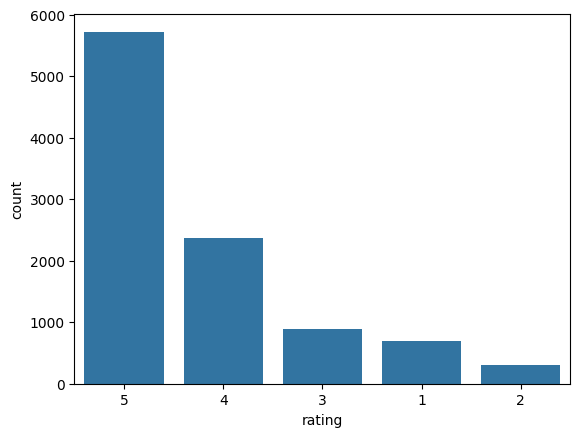

In [7]:
sns.countplot(data=data, 
			x='rating', 
			order=data.rating.value_counts().index)


In [8]:
# rating label(final) 
pos_neg = [] 
for i in range(len(data['rating'])): 
	if data['rating'][i] >= 5: 
		pos_neg.append(1) 
	else: 
		pos_neg.append(0) 

data['label'] = pos_neg 


In [9]:
from tqdm import tqdm 


def preprocess_text(text_data): 
	preprocessed_text = [] 

	for sentence in tqdm(text_data): 
		# Removing punctuations 
		sentence = re.sub(r'[^\w\s]', '', sentence) 

		# Converting lowercase and removing stopwords 
		preprocessed_text.append(' '.join(token.lower() 
										for token in nltk.word_tokenize(sentence) 
										if token.lower() not in stopwords.words('english'))) 

	return preprocessed_text 




In [10]:
preprocessed_review = preprocess_text(data['review'].values) 
data['review'] = preprocessed_review


  0%|          | 0/9976 [00:00<?, ?it/s]


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\user/nltk_data'
    - 'c:\\Program Files\\Python39\\nltk_data'
    - 'c:\\Program Files\\Python39\\share\\nltk_data'
    - 'c:\\Program Files\\Python39\\lib\\nltk_data'
    - 'C:\\Users\\user\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [11]:
data.head()


,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [12]:
data["label"].value_counts()


1    5726
0    4250
Name: label, dtype: int64

In [19]:
import matplotlib.pyplot as plt
plt.scatter(rating , lable)
plt.show()

NameError: name 'rating' is not defined

In [13]:
consolidated = ' '.join( 
	word for word in data['review'][data['label'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
					random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 


ValueError: Only supported for TrueType fonts

<Figure size 1500x1000 with 0 Axes>

In [14]:
cv = TfidfVectorizer(max_features=2500) 
X = cv.fit_transform(data['review'] ).toarray()


In [15]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], 
													test_size=0.33, 
													stratify=data['label'], 
													random_state = 42)


In [17]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 

#testing the model 
pred = model.predict(X_train) 
print(accuracy_score(y_train,pred))


0.9362561723776747


In [18]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=0) 
model.fit(X_train,y_train) 

#testing the model 
pred = model.predict(X_train) 
print(accuracy_score(y_train,pred))

0.9362561723776747


In [ ]:
data.head(100)

,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1
...,...,...,...
95,This is my genuine review Sound quality is nic...,1,0
96,it's very amazing product bass quality is exce...,5,1
97,The product is very good the bass is just awes...,5,1
98,super duper hit bass and sound quality is best...,5,1


In [22]:
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(df , x = 'rating' , y = 'lable')
plt.show()

NameError: name 'df' is not defined

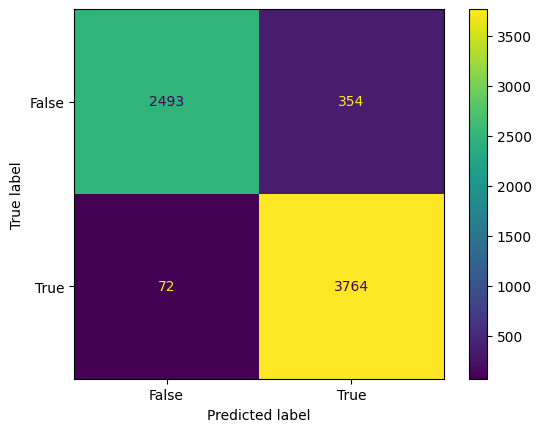

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_train,pred) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
											display_labels = [False, True]) 

cm_display.plot() 
plt.show()
